In [118]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
def load_datasets(filename, column_list, target_column):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    column_list - список назв колонок-характеристик
    target_column - назва колонки з цільовою величиною
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values.reshape(-1,1)
    return X, y

In [120]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [121]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [122]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X_new - набір нормалізованих характеристик, (X-mean)/std
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    ##################
    # Заповнити змінні
    ##################
    mean = X.mean()
    std = X.std()
    X_new = (X-mean)/std
    return X_new, mean, std

In [123]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [124]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    ######################
    # 1 рядок коду
    h_thetha = np.matmul(X, theta.reshape((theta.shape[0],1)))
    ######################
    return h_thetha

In [125]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    ######################
    # 1-2 рядки коду
    J = (1/(2*m)) * np.dot((hypothesis(X, theta) - y).reshape(1, -1)[0], (hypothesis(X, theta) - y).reshape(1, -1)[0])
    ######################

    #in case of sum/square
    #J = (1/(2*m)) * np.sum(np.square(hypothesis(X, theta) - y))
    return J

In [126]:
def derivative(X, y, theta):
    m = X.shape[0]
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    ######################
    # 1 рядок коду
    d_thetha = (1/m)*np.matmul((hypothesis(X, theta)-y).reshape((1, X.shape[0]))[0], X)
    ######################

    #in case of cycles
    #d_thetha=np.array((1/m) * np.sum(hypothesis(X, theta) - y), (1/m) * np.sum(np.dot((hypothesis(X, theta) - y), X[:,1].reshape((1,X.shape[0])))))
    #print(d_thetha, (hypothesis(X, theta)-y).reshape((1, X.shape[0]))[0], X)
    
    return d_thetha

In [127]:
def gradient_descent(X, y, theta, alpha, num_iters, eps, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    
    
    1) J_i (theta_0, theta_1)
    2)  theta_0 = theta_0 - alpha*dtheta_0
        theta_1 = theta_1 - alpha*dtheta_1
        |J_i-J_{i-1}| < eps || num_iters>10000000000 -> break
    3) goto 1
    '''
    m = X.shape[0]
    J_history = []
    iteration_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    iteration_history.append(0)
    for i in range(num_iters):
        ######################
        # Використати написані вище функції
        delta = derivative(X, y, theta)
        theta = theta - alpha * delta
        J = cost_function(X, y, theta)
        ######################
        if print_J == True:
            print(J)
        J_history.append(J)
        iteration_history.append(i+1)

        #stop condition
        if abs(J_history[i+1]-J_history[i])<eps:
            break
    return theta, J_history, iteration_history

In [128]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [129]:
X, y = load_datasets('burrito.csv', ["A"], "B")
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97, 1), y=(97, 1)


In [130]:
y

array([[17.592  ],
       [ 9.1302 ],
       [13.662  ],
       [11.854  ],
       [ 6.8233 ],
       [11.886  ],
       [ 4.3483 ],
       [12.     ],
       [ 6.5987 ],
       [ 3.8166 ],
       [ 3.2522 ],
       [15.505  ],
       [ 3.1551 ],
       [ 7.2258 ],
       [ 0.71618],
       [ 3.5129 ],
       [ 5.3048 ],
       [ 0.56077],
       [ 3.6518 ],
       [ 5.3893 ],
       [ 3.1386 ],
       [21.767  ],
       [ 4.263  ],
       [ 5.1875 ],
       [ 3.0825 ],
       [22.638  ],
       [13.501  ],
       [ 7.0467 ],
       [14.692  ],
       [24.147  ],
       [-1.22   ],
       [ 5.9966 ],
       [12.134  ],
       [ 1.8495 ],
       [ 6.5426 ],
       [ 4.5623 ],
       [ 4.1164 ],
       [ 3.3928 ],
       [10.117  ],
       [ 5.4974 ],
       [ 0.55657],
       [ 3.9115 ],
       [ 5.3854 ],
       [ 2.4406 ],
       [ 6.7318 ],
       [ 1.0463 ],
       [ 5.1337 ],
       [ 1.844  ],
       [ 8.0043 ],
       [ 1.0179 ],
       [ 6.7504 ],
       [ 1.8396 ],
       [ 4.2

Розбиття датасету на частини:

In [131]:
test_size = 0.2 #0.0
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77, 1), y=(77, 1)
Test set: X=(20, 1), y=(20, 1)


Відображення тренувальних і тестових даних на графіку (для 1 змінної)

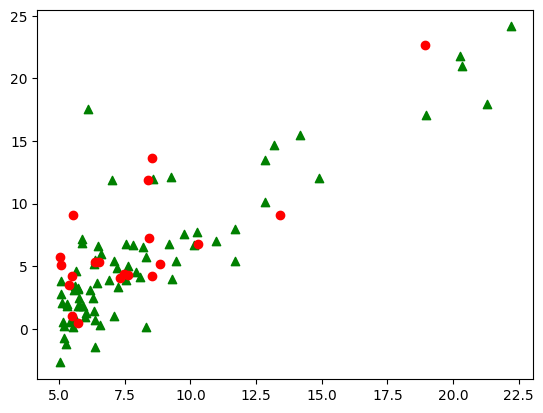

In [132]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [133]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

Для спрощення записів аліас для вектора передбачуваних значень

In [134]:
y = y_train[:]

У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [135]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

#test on ALL data
X_old,y_old = load_datasets('burrito.csv', ["A"], "B")
theta_old = np.array([0, 0])
#print(theta_old.reshape((2, 1)))
X_train_old, mean, std = normalize(X_old)
X_old = prepare_X(X_train_old)
print('X: {}'.format(X_old.shape))
print('y: {}'.format(y_old.shape))
print(cost_function(X_old, y_old, theta_old))


X: (77, 2)
y: (77, 1)
31.642345865490267
X: (97, 2)
y: (97, 1)
32.072733877455676


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [136]:
alpha = 0.01
num_iters = 1500

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: 5.84; Theta 1: 4.59

Theta 0: 5.626091521008332; Theta 1: 4.806097160253679
Theta 0: 5.839133395240996; Theta 1: 4.593039830519434


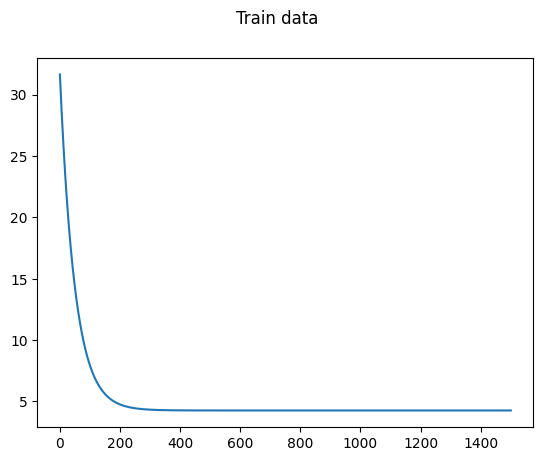

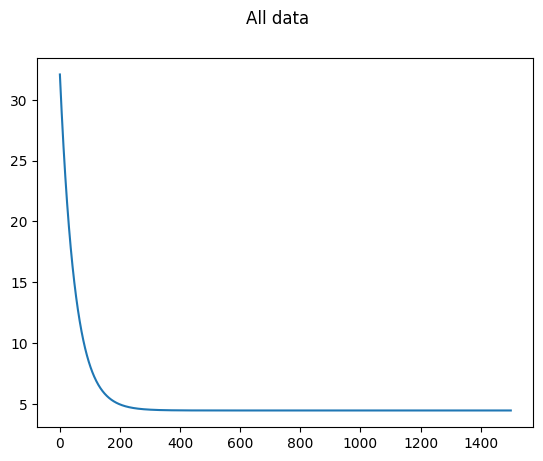

In [137]:
new_theta, Js, Is = gradient_descent(X, y, theta, alpha, num_iters, 10**(-20), False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))
f = plt.figure(1)
f.suptitle('Train data')
plt.plot(Is, Js)

#test on ALL data
new_theta_old, Js_old, Is_old = gradient_descent(X_old, y_old, theta_old, alpha, num_iters, 10**(-20), False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta_old[0], new_theta_old[1]))
g = plt.figure(2)
g.suptitle('All data')
plt.plot(Is_old, Js_old)

plt.show()

Відображення штрафної функції як функції від thetha0, thetha1.

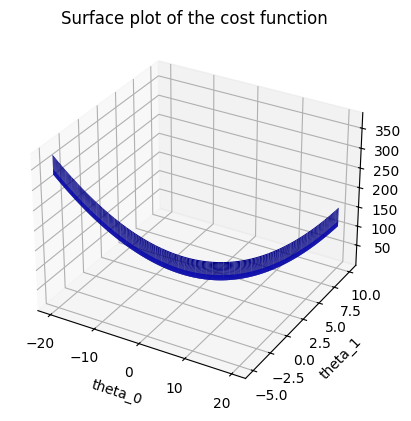

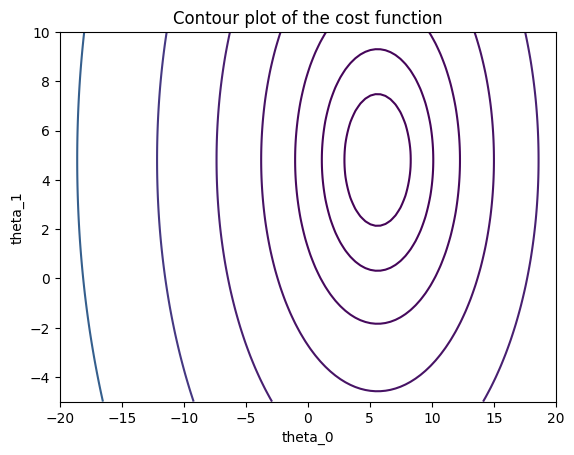

In [138]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

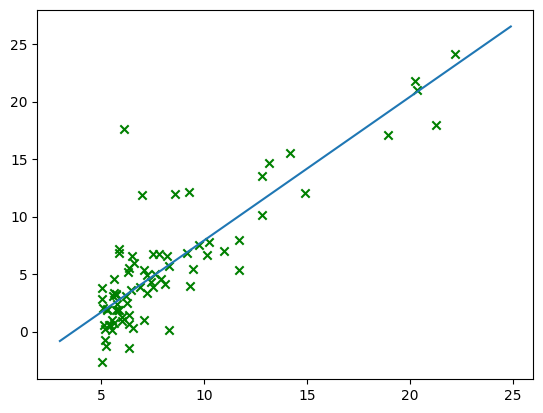

In [139]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*(x-mean)/std

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [140]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc = (X_test-mean)/std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

#needed to transpose all columns into row-vectors
res = pd.DataFrame({'X' : X_test.transpose()[0], 'y_actual' : y_test.transpose()[0], 'y_pred' : y_test_pred.transpose()[0], 'err' : rel_diff.transpose()[0]})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred         err
0    5.3794   3.51290   2.155111   38.651514
1    5.4901   4.26300   2.293306   46.204410
2    6.3654   5.30480   3.386008   36.170859
3    7.6366   4.29590   4.972942   15.760189
4   18.9450  22.63800  19.090061   15.672495
5   10.2740   6.75260   8.265405   22.403296
6    8.8254   5.16940   6.457010   24.908299
7    5.0365   5.70140   1.727043   69.708434
8    8.5172   4.24150   6.072261   43.163046
9    8.4084   7.22580   5.936437   17.843873
10   6.5159   5.34360   3.573889   33.118336
11   8.5186  13.66200   6.074008   55.540856
12  13.3940   9.05510  12.160334   34.292648
13   7.3345   4.02590   4.595808   14.156040
14   5.5277   9.13020   2.340245   74.368087
15   5.4994   1.01730   2.304916  126.571896
16   7.4764   4.34830   4.772952    9.765940
17   5.7292   0.47953   2.591792  440.485969
18   5.0702   5.13370   1.769114   65.539211
19   8.3829  11.88600   5.904604   50.323037
5.434630272557554
